## NEW

In [1]:
!pip install semopy

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as statistics
import semopy as sem

np.random.seed(1)

In [3]:
data = pd.read_csv('complete_data_term2run.csv', index_col=0)
print(data)

                                                title  \
0                                           Kill Bill   
1                                              Mahika   
2                                           Anti-Hero   
3                                        Here With Me   
4                                               Ditto   
5                                       Made You Look   
6                        Wet The Bed (feat. Ludacris)   
7                           Unholy (feat. Kim Petras)   
8                                 Under The Influence   
9             Babalik Sa'yo (from "2 Good 2 Be True")   
10  Until I Found You (with Em Beihold) - Em Beiho...   
11                                      Midnight Rain   
12                                             Umaasa   
13                                             Fallen   
14                                        Die For You   
15                                          As It Was   
16                             

In [4]:
# split data
data = data.drop(columns=['title', 'artist/s'])
X_data =  data.values[:,:-1]
y_data = data.values[:,-1]

print(X_data.shape)
print(y_data.shape)

(50, 35)
(50,)


In [5]:
data_copy = data

# SEM part

### intrinsic, extrinsic, crowdsourced

In [6]:
# standardize non-categorical features
from sklearn.preprocessing import StandardScaler
cols_to_norm = ['danceability', 'loudness', 'speechiness', 'liveness', 'valence', 'tempo', 'duration_ms', 'chart_history', 'mean_trends', 'song_familiarity', 
                'artist_familiarity', 'bad_good', 'distasteful_tasty', 'dull_exciting', 'tasteless_tasteful', 'unimaginative_creative', 'untalented_talented', 
                'unpleasant_pleasant', 'forgettable_memorable', 'boring_interesting', 'listen_similar', 'share_friends', 'add_playlist']
data[cols_to_norm] = StandardScaler().fit_transform(data[cols_to_norm])
print(data)

    danceability   key  loudness  speechiness  liveness   valence     tempo  \
0       0.171296   8.0  0.659571    -0.560930  0.075174  0.006385 -1.085234   
1       0.109082   7.0 -0.016410    -0.440598 -0.228504  0.859390 -1.344540   
2       0.122908   4.0  0.324438    -0.055533 -0.187094  0.520183 -0.789047   
3      -0.312592   4.0 -0.344195    -0.852737 -0.380344 -0.701958  0.504898   
4       1.346453   6.0  0.575073     1.722380 -0.776507 -1.225733  0.572560   
5       1.512357  10.0  1.552714     0.383680 -1.082946  2.271087  0.983748   
6      -0.271116   6.0 -0.016001    -0.326282  0.254621 -0.088393  0.201062   
7       0.655184   2.0 -0.003755     0.982335  1.524550 -0.951374  0.471565   
8       0.786525   9.0  0.749783    -0.332298 -0.697826 -0.592215 -0.050558   
9      -0.720440   1.0 -0.176424     1.180883  2.407980  1.328293  1.459900   
10     -0.471583  10.0  0.827341    -0.756471  0.641121 -0.432588 -0.634506   
11      0.164384   0.0 -1.784735     0.690528 -0.559

In [7]:
print(sem.efa.explore_cfa_model(data))

eta3 =~ stream8 + stream9 + stream7 + stream6 + stream_category + stream5 + artist_familiarity
eta4 =~ bad_good + share_friends + unpleasant_pleasant + tasteless_tasteful + distasteful_tasty + boring_interesting + listen_similar + add_playlist + unimaginative_creative + untalented_talented + forgettable_memorable + dull_exciting + song_familiarity
eta5 =~ valence + duration_ms + danceability + speechiness + loudness
eta6 =~ song_familiarity + artist_familiarity + forgettable_memorable
eta8 =~ stream5 + stream6 + stream3 + stream4 + stream2 + stream1



In [8]:
mod = """
chart_success =~ stream1 + stream2 + stream3 + stream4 + stream5 + stream6 + stream6 + stream7 + stream8 + stream9 + stream_category
intrinsic =~ danceability + key + loudness + speechiness + liveness + valence + tempo + duration_ms
extrinsic =~ music_label + artist_collab + chart_history + mean_trends
crowdsource =~ song_familiarity + artist_familiarity + bad_good + distasteful_tasty + dull_exciting + tasteless_tasteful + unimaginative_creative + untalented_talented + unpleasant_pleasant + forgettable_memorable + boring_interesting + listen_similar + share_friends + add_playlist

chart_success ~ intrinsic + extrinsic + crowdsource

DEFINE(ordinal) key music_label artist_collab stream1 stream2 stream3 stream4 stream5 stream6 stream7 stream8 stream9 stream_category
      """

In [9]:
model = sem.Model(mod)
result = model.fit(data, obj="FIML", solver="SLSQP") #can change obj and solver
print(result)

C:\Users\angel\anaconda3\lib\site-packages\semopy\polycorr.py:204: RuntimeWarning: divide by zero encountered in log
  return -sum(np.log(bivariate_cdf([x_ints[i], y_ints[j]],
C:\Users\angel\anaconda3\lib\site-packages\semopy\polycorr.py:204: RuntimeWarning: invalid value encountered in double_scalars
  return -sum(np.log(bivariate_cdf([x_ints[i], y_ints[j]],


Name of objective: FIML
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 879.467
Number of iterations: 320
Params: 1.012 1.002 1.021 1.009 1.012 0.994 0.973 0.967 0.951 0.084 0.745 0.575 -0.205 0.971 0.014 -0.894 0.023 -0.006 0.009 0.244 2.414 2.396 1.679 2.374 2.100 2.238 2.407 1.905 2.183 2.294 2.349 2.276 -2.526 1.378 -2.365 47.076 0.837 0.139 0.061 0.556 0.058 0.418 0.046 0.507 0.998 0.052 14.887 0.153 0.097 0.158 0.078 0.539 0.278 0.000 0.181 0.424 0.543 0.979 0.727 0.118 0.536 1.078 0.606 0.622 0.220 0.475 0.406 1.000 0.836 0.990 0.125 0.997 0.493 0.083 1.054 0.164 0.400 42.935


In [10]:
sem_all_pd = model.inspect()
sem_all_pd

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,chart_success,~,intrinsic,-2.525838,1.497454,-1.686755,0.091651
1,chart_success,~,extrinsic,1.377928,0.305821,4.50567,0.000007
2,chart_success,~,crowdsource,-2.365043,2.142884,-1.103673,0.269735
3,stream1,~,chart_success,1.000000,-,-,-
4,stream2,~,chart_success,1.011716,0.017642,57.346186,0.0
...,...,...,...,...,...,...,...
77,tempo,~~,tempo,0.999903,0.199987,4.999848,0.000001
78,song_familiarity,~~,song_familiarity,0.836381,0.167603,4.990261,0.000001
79,artist_familiarity,~~,artist_familiarity,0.990279,0.198075,4.999511,0.000001
80,stream5,~~,stream5,0.124595,0.030775,4.048579,0.000052


In [11]:
sem_all_pd.to_csv(r'SEM_three_results_term3.csv')

In [12]:
stats = sem.calc_stats(model)
print(stats.T)

C:\Users\angel\anaconda3\lib\site-packages\semopy\polycorr.py:204: RuntimeWarning: divide by zero encountered in log
  return -sum(np.log(bivariate_cdf([x_ints[i], y_ints[j]],
C:\Users\angel\anaconda3\lib\site-packages\semopy\polycorr.py:204: RuntimeWarning: invalid value encountered in double_scalars
  return -sum(np.log(bivariate_cdf([x_ints[i], y_ints[j]],


                    Value
DoF            588.000000
DoF Baseline   630.000000
chi2            17.589336
chi2 p-value     1.000000
chi2 Baseline   85.267164
CFI             -0.047138
GFI              0.793715
AGFI             0.778980
NFI              0.793715
TLI             -0.121934
RMSEA            0.000000
AIC             59.863457
BIC            209.001251
LogLik          48.068272


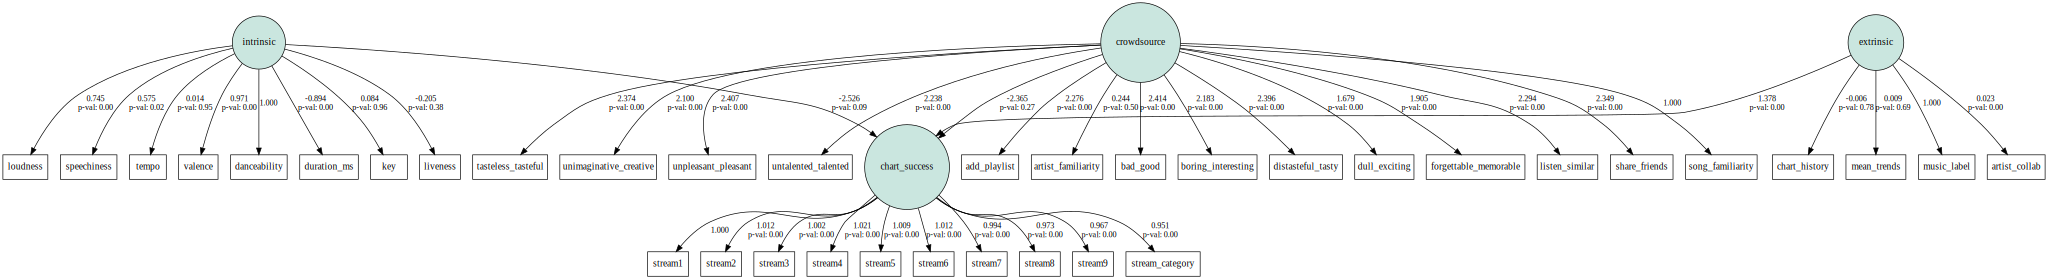

In [13]:
g = sem.semplot(model, "pd1_term3.png")
g

### intrinsic, extrinsic

In [14]:
mod2 = """
chart_success =~ stream1 + stream2 + stream3 + stream4 + stream5 + stream6 + stream6 + stream7 + stream8 + stream9 + stream_category
intrinsic =~ danceability + key + loudness + speechiness + liveness + valence + tempo + duration_ms
extrinsic =~ music_label + artist_collab + chart_history + mean_trends

chart_success ~ intrinsic + extrinsic

DEFINE(ordinal) key music_label artist_collab stream1 stream2 stream3 stream4 stream5 stream6 stream7 stream8 stream9 stream_category
      """

In [15]:
model2 = sem.Model(mod2)
result2 = model2.fit(data, obj="FIML", solver="SLSQP") #can change obj and solver
print(result2)

C:\Users\angel\anaconda3\lib\site-packages\semopy\polycorr.py:204: RuntimeWarning: divide by zero encountered in log
  return -sum(np.log(bivariate_cdf([x_ints[i], y_ints[j]],
C:\Users\angel\anaconda3\lib\site-packages\semopy\polycorr.py:204: RuntimeWarning: invalid value encountered in double_scalars
  return -sum(np.log(bivariate_cdf([x_ints[i], y_ints[j]],


Name of objective: FIML
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 1149.884
Number of iterations: 131
Params: 1.012 1.003 1.021 1.009 1.013 0.994 0.974 0.967 0.951 0.596 0.843 0.629 -0.188 1.004 0.045 -0.924 0.007 -0.007 -0.000 26.752 -6.146 46.913 357.863 0.823 0.555 0.425 0.543 0.058 0.984 0.417 0.683 0.140 0.551 1.079 0.554 0.619 0.621 0.474 1.000 57.810 0.999 0.158 0.124 1.000 0.461 1.888 0.000


In [16]:
sem_ixe_pd = model2.inspect()
sem_ixe_pd

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,chart_success,~,intrinsic,26.752190,174.748914,0.153089,0.878328
1,chart_success,~,extrinsic,-6.145614,42.812147,-0.143548,0.885857
2,stream1,~,chart_success,1.000000,-,-,-
3,stream2,~,chart_success,1.012183,0.018831,53.750352,0.0
4,stream3,~,chart_success,1.002590,0.018085,55.437493,0.0
5,stream4,~,chart_success,1.021423,0.017802,57.377593,0.0
6,stream5,~,chart_success,1.009022,0.015006,67.241186,0.0
7,stream6,~,chart_success,1.012936,0.014389,70.396779,0.0
8,stream7,~,chart_success,0.994455,0.015163,65.582255,0.0
9,stream8,~,chart_success,0.973570,0.017366,56.060558,0.0


In [17]:
sem_ixe_pd.to_csv(r'SEM_two_term3_results.csv')

In [18]:
stats2 = sem.calc_stats(model2)
print(stats2.T)

C:\Users\angel\anaconda3\lib\site-packages\semopy\polycorr.py:204: RuntimeWarning: divide by zero encountered in log
  return -sum(np.log(bivariate_cdf([x_ints[i], y_ints[j]],
C:\Users\angel\anaconda3\lib\site-packages\semopy\polycorr.py:204: RuntimeWarning: invalid value encountered in double_scalars
  return -sum(np.log(bivariate_cdf([x_ints[i], y_ints[j]],


                    Value
DoF            206.000000
DoF Baseline   231.000000
chi2            22.997685
chi2 p-value     1.000000
chi2 Baseline   71.267099
CFI             -0.145677
GFI              0.677303
AGFI             0.638141
NFI              0.677303
TLI             -0.284716
RMSEA            0.000000
AIC             34.612591
BIC            124.477672
LogLik          29.693704


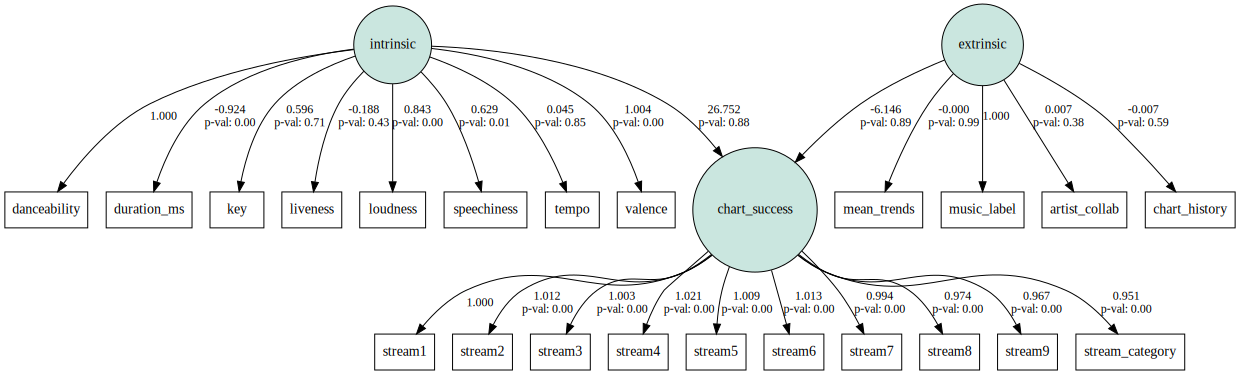

In [19]:
g2 = sem.semplot(model2, "pd2_term3.png")
g2

### relationship of features to danceability

In [20]:
mod3 = """
danceability =~ valence + duration_ms + loudness + speechiness + tempo + key + liveness

DEFINE(ordinal) key
      """

In [21]:
model3 = sem.Model(mod3)
result3 = model3.fit(data) #can change obj and solver
print(result3)

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 0.136
Number of iterations: 15
Params: -0.914 0.933 0.698 0.166 0.007 0.071 0.796 1.000 0.998 0.651 0.989 0.635 0.581 0.419


In [22]:
model3.inspect()

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,valence,~,danceability,1.000000,-,-,-
1,duration_ms,~,danceability,-0.913568,0.343675,-2.658229,0.007855
2,loudness,~,danceability,0.933298,0.34903,2.673978,0.007496
3,speechiness,~,danceability,0.697571,0.306032,2.279404,0.022643
4,tempo,~,danceability,0.165849,0.26771,0.61951,0.535581
5,key,~,danceability,0.007186,0.265489,0.027067,0.978406
6,liveness,~,danceability,0.071278,0.265897,0.268065,0.788649
7,danceability,~~,danceability,0.418781,0.215537,1.942964,0.052021
8,speechiness,~~,speechiness,0.796432,0.18207,4.374305,0.000012
9,key,~~,key,1.000005,0.200003,4.999949,0.000001


In [23]:
stats3 = sem.calc_stats(model3)
print(stats3.T)

                   Value
DoF            14.000000
DoF Baseline   21.000000
chi2            6.799437
chi2 p-value    0.942167
chi2 Baseline  33.597100
CFI             1.571605
GFI             0.797618
AGFI            0.696427
NFI             0.797618
TLI             1.857407
RMSEA           0.000000
AIC            27.728023
BIC            54.496345
LogLik          0.135989


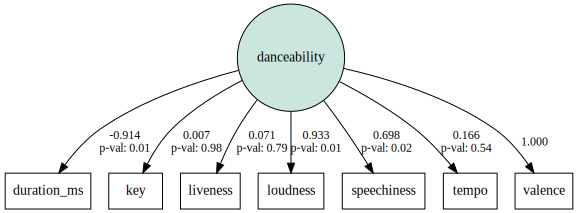

In [24]:
g3 = sem.semplot(model3, "pd3_term3.png")
g3

### relationship of faetures to valence

In [25]:
mod4 = """
valence =~ danceability + key + loudness + speechiness + liveness + tempo + duration_ms

DEFINE(ordinal) key
      """

In [26]:
model4 = sem.Model(mod4)
result4 = model4.fit(data) #can change obj and solver
print(result4)

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 0.302
Number of iterations: 32
Params: -0.094 0.777 0.626 -0.156 -0.021 -1.240 0.997 0.852 0.622 0.991 1.000 0.771 0.418 0.378


In [27]:
model4.inspect()

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,danceability,~,valence,1.000000,-,-,-
1,key,~,valence,-0.093604,0.272843,-0.343069,0.731546
2,loudness,~,valence,0.777011,0.313171,2.481106,0.013098
3,speechiness,~,valence,0.625877,0.298965,2.093477,0.036307
4,liveness,~,valence,-0.156489,0.273951,-0.571228,0.567845
5,tempo,~,valence,-0.021132,0.272259,-0.077618,0.938132
6,duration_ms,~,valence,-1.239975,0.466995,-2.655218,0.007926
7,valence,~~,valence,0.378485,0.2046,1.849877,0.064331
8,key,~~,key,0.996641,0.199596,4.993296,0.000001
9,speechiness,~~,speechiness,0.851782,0.184072,4.627427,0.000004


In [28]:
stats4 = sem.calc_stats(model4)
print(stats4.T)

                   Value
DoF            14.000000
DoF Baseline   21.000000
chi2           15.095924
chi2 p-value    0.371629
chi2 Baseline  41.706641
CFI             0.947074
GFI             0.638045
AGFI            0.457068
NFI             0.638045
TLI             0.920611
RMSEA           0.039969
AIC            27.396163
BIC            54.164485
LogLik          0.301918


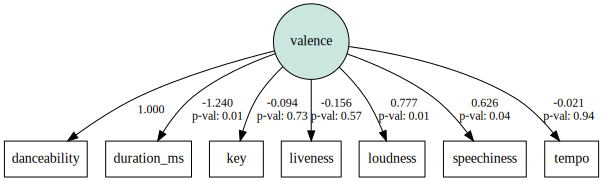

In [29]:
g4 = sem.semplot(model4, "pd4_term3.png")
g4

## SEM predict

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data, random_state=42)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)

X_train:  (37, 36)
y_train:  (37, 36)
X_test:  (13, 36)
y_test:  (13, 36)


In [36]:
from semopy import Model
model5 = Model(mod)
model5.fit(X_train)
predictions_test_sem = model5.predict(X_test)

C:\Users\angel\anaconda3\lib\site-packages\semopy\polycorr.py:204: RuntimeWarning: divide by zero encountered in log
  return -sum(np.log(bivariate_cdf([x_ints[i], y_ints[j]],
C:\Users\angel\anaconda3\lib\site-packages\semopy\polycorr.py:204: RuntimeWarning: invalid value encountered in double_scalars
  return -sum(np.log(bivariate_cdf([x_ints[i], y_ints[j]],


In [31]:
def compute_RMSE(predictions, actual):
    return np.sqrt(np.square(np.subtract(actual, predictions)).mean())
def compute_mae(predictions, actual):
    mae = np.absolute(np.subtract(actual, predictions)).mean()
    return mae
def compute_accuracy(predictions, actual):
    # write code here
    num_correct = np.sum(predictions == actual)
    accuracy = num_correct/len(actual)
    return accuracy*100

In [37]:
y_data_sem = X_test['stream_category']
test_rmse_sem = compute_RMSE(predictions_test_sem['stream_category'], y_data_sem)
print('RMSE: {}'.format(test_rmse_sem))

test_mae_sem = compute_mae(predictions_test_sem['stream_category'], y_data_sem)
print('MAE: {}'.format(test_mae_sem))

test_acc_sem = compute_accuracy(predictions_test_sem['stream_category'], y_data_sem)
print('Accuracy: {}'.format(test_acc_sem))

RMSE: 0.0
MAE: 0.0
Accuracy: 100.0


In [38]:
predictions_test_sem

,add_playlist,artist_collab,artist_familiarity,bad_good,boring_interesting,chart_history,danceability,distasteful_tasty,dull_exciting,duration_ms,...,stream7,stream8,stream9,stream_category,tasteless_tasteful,tempo,unimaginative_creative,unpleasant_pleasant,untalented_talented,valence
13,0.131945,0.0,-1.070789,0.797947,0.973344,-0.713161,0.226598,0.282270,1.267134,-0.313797,...,9.0,9.0,9.0,9.0,0.597257,-0.749470,1.355954,0.501707,0.766881,0.929226
39,-0.790249,0.0,1.457557,-1.137028,-0.674748,-0.920959,-0.181251,-1.032652,0.363329,-0.808485,...,9.0,9.0,9.0,9.0,-1.375664,-0.679368,-0.662381,-1.402462,-1.399449,1.767266
30,-1.428691,0.0,0.466719,-2.150587,-0.965588,-1.752149,0.627534,-2.522896,-1.353899,1.172504,...,10.0,10.0,10.0,10.0,-2.541480,0.061782,-2.130261,-2.313152,-2.374297,-0.123312
45,0.628510,0.0,0.876721,0.521522,0.488611,-0.297566,-0.326417,0.194608,0.182569,0.478377,...,4.0,4.0,4.0,5.0,0.328222,-0.493489,0.163302,0.584497,0.658564,-1.106013
17,-1.641505,0.0,-0.455786,-1.137028,0.100824,-0.089769,-1.874859,-0.769667,1.357514,1.179974,...,9.0,9.0,8.0,7.0,-0.209847,0.711692,0.255044,-0.905722,-0.316284,-0.637110
48,0.912262,0.0,-1.480791,1.074372,0.779450,0.824540,0.821089,0.895900,0.634471,-0.810222,...,9.0,9.0,9.0,9.0,0.597257,-0.161901,0.530272,0.667287,0.766881,0.590020
26,-0.080869,0.0,1.457557,-0.031328,0.003878,-1.336554,1.761214,0.282270,0.092188,0.269970,...,9.0,9.0,9.0,9.0,-0.030491,0.134544,-0.203668,0.087757,-0.424601,1.662511
25,-0.506497,0.0,1.389224,0.521522,0.197771,0.824540,0.447804,-0.156037,1.267134,-0.592433,...,9.0,9.0,9.0,9.0,0.148866,0.320238,0.163302,0.336127,-0.532917,-0.906479
32,0.770386,0.0,-0.660787,0.245097,0.294718,0.824540,-0.416282,0.369931,-0.178953,0.098219,...,8.0,7.0,7.0,7.0,0.776613,-1.694790,0.622014,0.584497,0.441931,-0.452541
19,-0.861187,0.0,0.432552,-1.044887,-1.353374,-1.378113,0.392502,-0.594345,-0.811616,-0.235164,...,9.0,9.0,9.0,9.0,-0.747916,1.977885,-1.579806,-1.154092,-0.207968,0.465312


In [40]:
y_data_sem

13     9
39     9
30    10
45     5
17     7
48     9
26     9
25     9
32     7
19     9
12    10
4      9
37     9
Name: stream_category, dtype: int64

In [ ]:
# from semopy.examples import political_democracy
# from semopy import ModelMeans
# import numpy as np

# desc = political_democracy.get_model()
# data = political_democracy.get_data()

# i, v = 0, 'x1'
# x = data[v].values[i]

# data[v].values[i] = float('nan')
# model = ModelMeans(desc)
# model.fit(data, )
# preds = model.predict(data)
# diff = np.abs((x - preds[v].values[i])/x)
# print('{:.2f}%'.format(diff * 100))

## Prediction models (intrinsic, extrinsic, crowdsourced)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, random_state=42)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier()
rfc.get_params()

In [ ]:
hyperparameters = [
        {
        'n_estimators' : [50, 100, 200, 400, 600, 800, 1000, 1200, 1600, 1800],
        'max_depth' : [10, 30, 50, 100, 150, 200, 250, 300, 350, None],
        'min_samples_split' : [2, 4, 6, 10, 15, 20],
        'max_leaf_nodes' : [100, 300, 500, 700, 900, 1100, 1300, None]
    }
]

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rsrfc = RandomizedSearchCV(rfc, hyperparameters, random_state=42, cv=3, n_iter=100)
rsrfc.fit(X_train, y_train)

In [ ]:
best_params_rfc = rsrfc.best_params_
best_params_rfc

In [ ]:
best_model_rfc = rsrfc.best_estimator_

predictions_train_rfc = best_model_rfc.predict(X_train)

train_rmse_rfc = compute_RMSE(predictions_train_rfc, y_train)
print('Training RMSE: {}'.format(train_rmse_rfc))

train_mae_rfc = compute_mae(predictions_train_rfc, y_train)
print('Training MAE: {}'.format(train_mae_rfc))

train_acc = compute_accuracy(predictions_train_rfc, y_train)
print('Training Accuracy: {}'.format(train_acc))

predictions_test_rfc = best_model_rfc.predict(X_test)

test_rmse_rfc = compute_RMSE(predictions_test_rfc, y_test)
print('Test RMSE: {}'.format(test_rmse_rfc))

test_mae_rfc = compute_mae(predictions_test_rfc, y_test)
print('Test MAE: {}'.format(test_mae_rfc))

test_acc = compute_accuracy(predictions_test_rfc, y_test)
print('Test Accuracy: {}'.format(test_acc))

In [ ]:
best_model_rfc_3 = best_model_rfc

### SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm = SVC()
svm.get_params()

In [ ]:
hyperparameters = [
        {
        'C' : [0.1, 1, 100, 1000],
        'kernel' : ['rbf', 'poly', 'sigmoid', 'linear'],
        'degree' : [1, 2, 3, 4, 5, 6]
    }
]

In [ ]:
rssvm = RandomizedSearchCV(svm, hyperparameters, random_state=42, cv=3, n_iter=100)
rssvm.fit(X_train, y_train)

In [ ]:
best_params_svm = rssvm.best_params_
best_params_svm

In [ ]:
best_model_svm = rssvm.best_estimator_

predictions_train_svm = best_model_svm.predict(X_train)

train_rmse_svm = compute_RMSE(predictions_train_svm, y_train)
print('Training RMSE: {}'.format(train_rmse_svm))

train_mae_svm = compute_mae(predictions_train_svm, y_train)
print('Training MAE: {}'.format(train_mae_svm))

train_acc = compute_accuracy(predictions_train_svm, y_train)
print('Training Accuracy: {}'.format(train_acc))

predictions_test_svm = best_model_svm.predict(X_test)

test_rmse_svm = compute_RMSE(predictions_test_svm, y_test)
print('Test RMSE: {}'.format(test_rmse_svm))

test_mae_svm = compute_mae(predictions_test_svm, y_test)
print('Test MAE: {}'.format(test_mae_svm))

test_acc = compute_accuracy(predictions_test_svm, y_test)
print('Test Accuracy: {}'.format(test_acc))

In [ ]:
best_model_svm_3 = best_model_svm

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier()
dt.get_params()

In [ ]:
hyperparameters = [
    {
        'min_impurity_decrease': [0.001, 0.01, 0.05, 0.1, 0.3, 0.5],
        'max_depth': [5, 10, 20, 30],
        'min_samples_split': [2, 4, 6, 10, 15, 20],
        'max_leaf_nodes': [3, 5, 10, 20, 50, 100]
    }
]

In [ ]:
rsdt = RandomizedSearchCV(dt, hyperparameters, random_state=42, cv=3, n_iter=100)
rsdt.fit(X_train, y_train)

In [ ]:
best_params_dt = rsdt.best_params_
best_params_dt

In [ ]:
best_model_dt = rsdt.best_estimator_

predictions_train_dt = best_model_dt.predict(X_train)

train_rmse_dt = compute_RMSE(predictions_train_dt, y_train)
print('Training RMSE: {}'.format(train_rmse_dt))

train_mae_dt = compute_mae(predictions_train_dt, y_train)
print('Training MAE: {}'.format(train_mae_dt))

train_acc_dt = compute_accuracy(predictions_train_dt, y_train)
print('Training Accuracy: {}'.format(train_acc_dt))

predictions_test_dt = best_model_dt.predict(X_test)

test_rmse_dt = compute_RMSE(predictions_test_dt, y_test)
print('Test RMSE: {}'.format(test_rmse_dt))

test_mae_dt = compute_mae(predictions_test_dt, y_test)
print('Test MAE: {}'.format(test_mae_dt))

test_acc_dt = compute_accuracy(predictions_test_dt, y_test)
print('Test Accuracy: {}'.format(test_acc_dt))

In [ ]:
best_model_dt_3 = best_model_dt

## Prediction models (intrinsic and extrinsic)

In [ ]:
data_copy = data_copy.drop(columns=['song_familiarity', 'artist_familiarity', 'bad_good', 'distasteful_tasty', 'dull_exciting', 'tasteless_tasteful', 'unimaginative_creative', 'untalented_talented', 'unpleasant_pleasant', 'forgettable_memorable', 'boring_interesting', 'listen_similar', 'share_friends', 'add_playlist'])
X_data =  data_copy.values[:,:-1]
y_data = data_copy.values[:,-1]

print(X_data.shape)
print(y_data.shape)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, random_state=42)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Random Forest 

In [ ]:
rfc = RandomForestClassifier()
rfc.get_params()

In [ ]:
hyperparameters = [
        {
        'n_estimators' : [50, 100, 200, 400, 600, 800, 1000, 1200, 1600, 1800],
        'max_depth' : [10, 30, 50, 100, 150, 200, 250, 300, 350, None],
        'min_samples_split' : [2, 4, 6, 10, 15, 20],
        'max_leaf_nodes' : [100, 300, 500, 700, 900, 1100, 1300, None]
    }
]

In [ ]:
rsrfc = RandomizedSearchCV(rfc, hyperparameters, random_state=42, cv=3, n_iter=100)
rsrfc.fit(X_train, y_train)

In [ ]:
best_params_rfc = rsrfc.best_params_
best_params_rfc

In [ ]:
best_model_rfc = rsrfc.best_estimator_

predictions_train_rfc = best_model_rfc.predict(X_train)

train_rmse_rfc = compute_RMSE(predictions_train_rfc, y_train)
print('Training RMSE: {}'.format(train_rmse_rfc))

train_mae_rfc = compute_mae(predictions_train_rfc, y_train)
print('Training MAE: {}'.format(train_mae_rfc))

train_acc = compute_accuracy(predictions_train_rfc, y_train)
print('Training Accuracy: {}'.format(train_acc))

predictions_test_rfc = best_model_rfc.predict(X_test)

test_rmse_rfc = compute_RMSE(predictions_test_rfc, y_test)
print('Test RMSE: {}'.format(test_rmse_rfc))

test_mae_rfc = compute_mae(predictions_test_rfc, y_test)
print('Test MAE: {}'.format(test_mae_rfc))

test_acc = compute_accuracy(predictions_test_rfc, y_test)
print('Test Accuracy: {}'.format(test_acc))

In [ ]:
best_model_rfc_2 = best_model_rfc

### SVM

In [ ]:
svm = SVC()
svm.get_params()

In [ ]:
hyperparameters = [
        {
        'C' : [0.1, 1, 100, 1000],
        'kernel' : ['rbf', 'poly', 'sigmoid', 'linear'],
        'degree' : [1, 2, 3, 4, 5, 6]
    }
]

In [ ]:
rssvm = RandomizedSearchCV(svm, hyperparameters, random_state=42, cv=3, n_iter=100)
rssvm.fit(X_train, y_train)

In [ ]:
best_params_svm = rssvm.best_params_
best_params_svm

In [ ]:
best_model_svm = rssvm.best_estimator_

predictions_train_svm = best_model_svm.predict(X_train)

train_rmse_svm = compute_RMSE(predictions_train_svm, y_train)
print('Training RMSE: {}'.format(train_rmse_svm))

train_mae_svm = compute_mae(predictions_train_svm, y_train)
print('Training MAE: {}'.format(train_mae_svm))

train_acc = compute_accuracy(predictions_train_svm, y_train)
print('Training Accuracy: {}'.format(train_acc))

predictions_test_svm = best_model_svm.predict(X_test)

test_rmse_svm = compute_RMSE(predictions_test_svm, y_test)
print('Test RMSE: {}'.format(test_rmse_svm))

test_mae_svm = compute_mae(predictions_test_svm, y_test)
print('Test MAE: {}'.format(test_mae_svm))

test_acc = compute_accuracy(predictions_test_svm, y_test)
print('Test Accuracy: {}'.format(test_acc))

In [ ]:
best_model_svm_2 = best_model_svm

### Decision Tree

In [ ]:
dt = DecisionTreeClassifier()
dt.get_params()

In [ ]:
hyperparameters = [
    {
        'min_impurity_decrease': [0.001, 0.01, 0.05, 0.1, 0.3, 0.5],
        'max_depth': [5, 10, 20, 30],
        'min_samples_split': [2, 4, 6, 10, 15, 20],
        'max_leaf_nodes': [3, 5, 10, 20, 50, 100]
    }
]

In [ ]:
rsdt = RandomizedSearchCV(dt, hyperparameters, random_state=42, cv=3, n_iter=100)
rsdt.fit(X_train, y_train)

In [ ]:
best_params_dt = rsdt.best_params_
best_params_dt

In [ ]:
best_model_dt = rsdt.best_estimator_

predictions_train_dt = best_model_dt.predict(X_train)

train_rmse_dt = compute_RMSE(predictions_train_dt, y_train)
print('Training RMSE: {}'.format(train_rmse_dt))

train_mae_dt = compute_mae(predictions_train_dt, y_train)
print('Training MAE: {}'.format(train_mae_dt))

train_acc_dt = compute_accuracy(predictions_train_dt, y_train)
print('Training Accuracy: {}'.format(train_acc_dt))

predictions_test_dt = best_model_dt.predict(X_test)

test_rmse_dt = compute_RMSE(predictions_test_dt, y_test)
print('Test RMSE: {}'.format(test_rmse_dt))

test_mae_dt = compute_mae(predictions_test_dt, y_test)
print('Test MAE: {}'.format(test_mae_dt))

test_acc_dt = compute_accuracy(predictions_test_dt, y_test)
print('Test Accuracy: {}'.format(test_acc_dt))

In [ ]:
best_model_dt_2 = best_model_dt

## Prediction models (extrinsic only)

In [ ]:
data = data2
data = data.drop(columns=['song_familiarity', 'artist_familiarity', 'bad_good', 'distasteful_tasty', 'dull_exciting', 'tasteless_tasteful', 'unimaginative_creative', 'untalented_talented', 'unpleasant_pleasant', 'forgettable_memorable', 'boring_interesting', 'listen_similar', 'share_friends', 'add_playlist'])
data = data.drop(columns=['danceability', 'key', 'loudness', 'speechiness', 'liveness', 'valence', 'tempo', 'duration_ms'])
X_data =  data.values[:,:-1]
y_data = data.values[:,-1]

print(X_data.shape)
print(y_data.shape)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, random_state=42)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Random Forest 

In [ ]:
rfc = RandomForestClassifier()
rfc.get_params()

In [ ]:
hyperparameters = [
        {
        'n_estimators' : [50, 100, 200, 400, 600, 800, 1000, 1200, 1600, 1800],
        'max_depth' : [10, 30, 50, 100, 150, 200, 250, 300, 350, None],
        'min_samples_split' : [2, 4, 6, 10, 15, 20],
        'max_leaf_nodes' : [100, 300, 500, 700, 900, 1100, 1300, None]
    }
]

In [ ]:
rsrfc = RandomizedSearchCV(rfc, hyperparameters, random_state=42, cv=3, n_iter=100)
rsrfc.fit(X_train, y_train)

In [ ]:
best_params_rfc = rsrfc.best_params_
best_params_rfc

In [ ]:
best_model_rfc = rsrfc.best_estimator_

predictions_train_rfc = best_model_rfc.predict(X_train)

train_rmse_rfc = compute_RMSE(predictions_train_rfc, y_train)
print('Training RMSE: {}'.format(train_rmse_rfc))

train_mae_rfc = compute_mae(predictions_train_rfc, y_train)
print('Training MAE: {}'.format(train_mae_rfc))

train_acc = compute_accuracy(predictions_train_rfc, y_train)
print('Training Accuracy: {}'.format(train_acc))

predictions_test_rfc = best_model_rfc.predict(X_test)

test_rmse_rfc = compute_RMSE(predictions_test_rfc, y_test)
print('Test RMSE: {}'.format(test_rmse_rfc))

test_mae_rfc = compute_mae(predictions_test_rfc, y_test)
print('Test MAE: {}'.format(test_mae_rfc))

test_acc = compute_accuracy(predictions_test_rfc, y_test)
print('Test Accuracy: {}'.format(test_acc))

### SVM

In [ ]:
svm = SVC()
svm.get_params()

In [ ]:
hyperparameters = [
        {
        'C' : [0.1, 1, 100, 1000],
        'kernel' : ['rbf', 'poly', 'sigmoid', 'linear'],
        'degree' : [1, 2, 3, 4, 5, 6]
    }
]

In [ ]:
rssvm = RandomizedSearchCV(svm, hyperparameters, random_state=42, cv=3, n_iter=100)
rssvm.fit(X_train, y_train)

In [ ]:
best_params_svm = rssvm.best_params_
best_params_svm

In [ ]:
best_model_svm = rssvm.best_estimator_

predictions_train_svm = best_model_svm.predict(X_train)

train_rmse_svm = compute_RMSE(predictions_train_svm, y_train)
print('Training RMSE: {}'.format(train_rmse_svm))

train_mae_svm = compute_mae(predictions_train_svm, y_train)
print('Training MAE: {}'.format(train_mae_svm))

train_acc = compute_accuracy(predictions_train_svm, y_train)
print('Training Accuracy: {}'.format(train_acc))

predictions_test_svm = best_model_svm.predict(X_test)

test_rmse_svm = compute_RMSE(predictions_test_svm, y_test)
print('Test RMSE: {}'.format(test_rmse_svm))

test_mae_svm = compute_mae(predictions_test_svm, y_test)
print('Test MAE: {}'.format(test_mae_svm))

test_acc = compute_accuracy(predictions_test_svm, y_test)
print('Test Accuracy: {}'.format(test_acc))

### Decision Tree

In [ ]:
dt = DecisionTreeClassifier()
dt.get_params()

In [ ]:
hyperparameters = [
    {
        'min_impurity_decrease': [0.001, 0.01, 0.05, 0.1, 0.3, 0.5],
        'max_depth': [5, 10, 20, 30],
        'min_samples_split': [2, 4, 6, 10, 15, 20],
        'max_leaf_nodes': [3, 5, 10, 20, 50, 100]
    }
]

In [ ]:
rsdt = RandomizedSearchCV(dt, hyperparameters, random_state=42, cv=3, n_iter=100)
rsdt.fit(X_train, y_train)

In [ ]:
best_params_dt = rsdt.best_params_
best_params_dt

In [ ]:
best_model_dt = rsdt.best_estimator_

predictions_train_dt = best_model_dt.predict(X_train)

train_rmse_dt = compute_RMSE(predictions_train_dt, y_train)
print('Training RMSE: {}'.format(train_rmse_dt))

train_mae_dt = compute_mae(predictions_train_dt, y_train)
print('Training MAE: {}'.format(train_mae_dt))

train_acc_dt = compute_accuracy(predictions_train_dt, y_train)
print('Training Accuracy: {}'.format(train_acc_dt))

predictions_test_dt = best_model_dt.predict(X_test)

test_rmse_dt = compute_RMSE(predictions_test_dt, y_test)
print('Test RMSE: {}'.format(test_rmse_dt))

test_mae_dt = compute_mae(predictions_test_dt, y_test)
print('Test MAE: {}'.format(test_mae_dt))

test_acc_dt = compute_accuracy(predictions_test_dt, y_test)
print('Test Accuracy: {}'.format(test_acc_dt))

## Prediction models (intrinsic only)

In [ ]:
data = data2
data = data.drop(columns=['song_familiarity', 'artist_familiarity', 'bad_good', 'distasteful_tasty', 'dull_exciting', 'tasteless_tasteful', 'unimaginative_creative', 'untalented_talented', 'unpleasant_pleasant', 'forgettable_memorable', 'boring_interesting', 'listen_similar', 'share_friends', 'add_playlist'])
data = data.drop(columns=['music_label', 'artist_collab', 'chart_history', 'mean_trends'])
X_data =  data.values[:,:-1]
y_data = data.values[:,-1]

print(X_data.shape)
print(y_data.shape)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, random_state=42)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Random Forest 

In [ ]:
rfc = RandomForestClassifier()
rfc.get_params()

In [ ]:
hyperparameters = [
        {
        'n_estimators' : [50, 100, 200, 400, 600, 800, 1000, 1200, 1600, 1800],
        'max_depth' : [10, 30, 50, 100, 150, 200, 250, 300, 350, None],
        'min_samples_split' : [2, 4, 6, 10, 15, 20],
        'max_leaf_nodes' : [100, 300, 500, 700, 900, 1100, 1300, None]
    }
]

In [ ]:
rsrfc = RandomizedSearchCV(rfc, hyperparameters, random_state=42, cv=3, n_iter=100)
rsrfc.fit(X_train, y_train)

In [ ]:
best_params_rfc = rsrfc.best_params_
best_params_rfc

In [ ]:
best_model_rfc = rsrfc.best_estimator_

predictions_train_rfc = best_model_rfc.predict(X_train)

train_rmse_rfc = compute_RMSE(predictions_train_rfc, y_train)
print('Training RMSE: {}'.format(train_rmse_rfc))

train_mae_rfc = compute_mae(predictions_train_rfc, y_train)
print('Training MAE: {}'.format(train_mae_rfc))

train_acc = compute_accuracy(predictions_train_rfc, y_train)
print('Training Accuracy: {}'.format(train_acc))

predictions_test_rfc = best_model_rfc.predict(X_test)

test_rmse_rfc = compute_RMSE(predictions_test_rfc, y_test)
print('Test RMSE: {}'.format(test_rmse_rfc))

test_mae_rfc = compute_mae(predictions_test_rfc, y_test)
print('Test MAE: {}'.format(test_mae_rfc))

test_acc = compute_accuracy(predictions_test_rfc, y_test)
print('Test Accuracy: {}'.format(test_acc))

### SVM

In [ ]:
svm = SVC()
svm.get_params()

In [ ]:
hyperparameters = [
        {
        'C' : [0.1, 1, 100, 1000],
        'kernel' : ['rbf', 'poly', 'sigmoid', 'linear'],
        'degree' : [1, 2, 3, 4, 5, 6]
    }
]

In [ ]:
rssvm = RandomizedSearchCV(svm, hyperparameters, random_state=42, cv=3, n_iter=100)
rssvm.fit(X_train, y_train)

In [ ]:
best_params_svm = rssvm.best_params_
best_params_svm

In [ ]:
best_model_svm = rssvm.best_estimator_

predictions_train_svm = best_model_svm.predict(X_train)

train_rmse_svm = compute_RMSE(predictions_train_svm, y_train)
print('Training RMSE: {}'.format(train_rmse_svm))

train_mae_svm = compute_mae(predictions_train_svm, y_train)
print('Training MAE: {}'.format(train_mae_svm))

train_acc = compute_accuracy(predictions_train_svm, y_train)
print('Training Accuracy: {}'.format(train_acc))

predictions_test_svm = best_model_svm.predict(X_test)

test_rmse_svm = compute_RMSE(predictions_test_svm, y_test)
print('Test RMSE: {}'.format(test_rmse_svm))

test_mae_svm = compute_mae(predictions_test_svm, y_test)
print('Test MAE: {}'.format(test_mae_svm))

test_acc = compute_accuracy(predictions_test_svm, y_test)
print('Test Accuracy: {}'.format(test_acc))

### Decision Tree

In [ ]:
dt = DecisionTreeClassifier()
dt.get_params()

In [ ]:
hyperparameters = [
    {
        'min_impurity_decrease': [0.001, 0.01, 0.05, 0.1, 0.3, 0.5],
        'max_depth': [5, 10, 20, 30],
        'min_samples_split': [2, 4, 6, 10, 15, 20],
        'max_leaf_nodes': [3, 5, 10, 20, 50, 100]
    }
]

In [ ]:
rsdt = RandomizedSearchCV(dt, hyperparameters, random_state=42, cv=3, n_iter=100)
rsdt.fit(X_train, y_train)

In [ ]:
best_params_dt = rsdt.best_params_
best_params_dt

In [ ]:
best_model_dt = rsdt.best_estimator_

predictions_train_dt = best_model_dt.predict(X_train)

train_rmse_dt = compute_RMSE(predictions_train_dt, y_train)
print('Training RMSE: {}'.format(train_rmse_dt))

train_mae_dt = compute_mae(predictions_train_dt, y_train)
print('Training MAE: {}'.format(train_mae_dt))

train_acc_dt = compute_accuracy(predictions_train_dt, y_train)
print('Training Accuracy: {}'.format(train_acc_dt))

predictions_test_dt = best_model_dt.predict(X_test)

test_rmse_dt = compute_RMSE(predictions_test_dt, y_test)
print('Test RMSE: {}'.format(test_rmse_dt))

test_mae_dt = compute_mae(predictions_test_dt, y_test)
print('Test MAE: {}'.format(test_mae_dt))

test_acc_dt = compute_accuracy(predictions_test_dt, y_test)
print('Test Accuracy: {}'.format(test_acc_dt))

## Prediction models (crowdsource only)

In [ ]:
data = data2
data = data.drop(columns=['song_familiarity', 'artist_familiarity', 'bad_good', 'distasteful_tasty', 'dull_exciting', 'tasteless_tasteful', 'unimaginative_creative', 'untalented_talented', 'unpleasant_pleasant', 'forgettable_memorable', 'boring_interesting', 'listen_similar', 'share_friends', 'add_playlist'])
data = data.drop(columns=['music_label', 'artist_collab', 'chart_history', 'mean_trends'])
X_data =  data.values[:,:-1]
y_data = data.values[:,-1]

print(X_data.shape)
print(y_data.shape)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, random_state=42)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Random Forest 

In [ ]:
rfc = RandomForestClassifier()
rfc.get_params()

In [ ]:
hyperparameters = [
        {
        'n_estimators' : [50, 100, 200, 400, 600, 800, 1000, 1200, 1600, 1800],
        'max_depth' : [10, 30, 50, 100, 150, 200, 250, 300, 350, None],
        'min_samples_split' : [2, 4, 6, 10, 15, 20],
        'max_leaf_nodes' : [100, 300, 500, 700, 900, 1100, 1300, None]
    }
]

In [ ]:
rsrfc = RandomizedSearchCV(rfc, hyperparameters, random_state=42, cv=3, n_iter=100)
rsrfc.fit(X_train, y_train)

In [ ]:
best_params_rfc = rsrfc.best_params_
best_params_rfc

In [ ]:
best_model_rfc = rsrfc.best_estimator_

predictions_train_rfc = best_model_rfc.predict(X_train)

train_rmse_rfc = compute_RMSE(predictions_train_rfc, y_train)
print('Training RMSE: {}'.format(train_rmse_rfc))

train_mae_rfc = compute_mae(predictions_train_rfc, y_train)
print('Training MAE: {}'.format(train_mae_rfc))

train_acc = compute_accuracy(predictions_train_rfc, y_train)
print('Training Accuracy: {}'.format(train_acc))

predictions_test_rfc = best_model_rfc.predict(X_test)

test_rmse_rfc = compute_RMSE(predictions_test_rfc, y_test)
print('Test RMSE: {}'.format(test_rmse_rfc))

test_mae_rfc = compute_mae(predictions_test_rfc, y_test)
print('Test MAE: {}'.format(test_mae_rfc))

test_acc = compute_accuracy(predictions_test_rfc, y_test)
print('Test Accuracy: {}'.format(test_acc))

### SVM

In [ ]:
svm = SVC()
svm.get_params()

In [ ]:
hyperparameters = [
        {
        'C' : [0.1, 1, 100, 1000],
        'kernel' : ['rbf', 'poly', 'sigmoid', 'linear'],
        'degree' : [1, 2, 3, 4, 5, 6]
    }
]

In [ ]:
rssvm = RandomizedSearchCV(svm, hyperparameters, random_state=42, cv=3, n_iter=100)
rssvm.fit(X_train, y_train)

In [ ]:
best_params_svm = rssvm.best_params_
best_params_svm

In [ ]:
best_model_svm = rssvm.best_estimator_

predictions_train_svm = best_model_svm.predict(X_train)

train_rmse_svm = compute_RMSE(predictions_train_svm, y_train)
print('Training RMSE: {}'.format(train_rmse_svm))

train_mae_svm = compute_mae(predictions_train_svm, y_train)
print('Training MAE: {}'.format(train_mae_svm))

train_acc = compute_accuracy(predictions_train_svm, y_train)
print('Training Accuracy: {}'.format(train_acc))

predictions_test_svm = best_model_svm.predict(X_test)

test_rmse_svm = compute_RMSE(predictions_test_svm, y_test)
print('Test RMSE: {}'.format(test_rmse_svm))

test_mae_svm = compute_mae(predictions_test_svm, y_test)
print('Test MAE: {}'.format(test_mae_svm))

test_acc = compute_accuracy(predictions_test_svm, y_test)
print('Test Accuracy: {}'.format(test_acc))

### Decision Tree

In [ ]:
dt = DecisionTreeClassifier()
dt.get_params()

In [ ]:
hyperparameters = [
    {
        'min_impurity_decrease': [0.001, 0.01, 0.05, 0.1, 0.3, 0.5],
        'max_depth': [5, 10, 20, 30],
        'min_samples_split': [2, 4, 6, 10, 15, 20],
        'max_leaf_nodes': [3, 5, 10, 20, 50, 100]
    }
]

In [ ]:
rsdt = RandomizedSearchCV(dt, hyperparameters, random_state=42, cv=3, n_iter=100)
rsdt.fit(X_train, y_train)

In [ ]:
best_params_dt = rsdt.best_params_
best_params_dt

In [ ]:
best_model_dt = rsdt.best_estimator_

predictions_train_dt = best_model_dt.predict(X_train)

train_rmse_dt = compute_RMSE(predictions_train_dt, y_train)
print('Training RMSE: {}'.format(train_rmse_dt))

train_mae_dt = compute_mae(predictions_train_dt, y_train)
print('Training MAE: {}'.format(train_mae_dt))

train_acc_dt = compute_accuracy(predictions_train_dt, y_train)
print('Training Accuracy: {}'.format(train_acc_dt))

predictions_test_dt = best_model_dt.predict(X_test)

test_rmse_dt = compute_RMSE(predictions_test_dt, y_test)
print('Test RMSE: {}'.format(test_rmse_dt))

test_mae_dt = compute_mae(predictions_test_dt, y_test)
print('Test MAE: {}'.format(test_mae_dt))

test_acc_dt = compute_accuracy(predictions_test_dt, y_test)
print('Test Accuracy: {}'.format(test_acc_dt))

# Out of Time testing

Test data using best model from **crowdsource+extrinsic+intrinsic** and **intrinsic+extrinsic**

best_model_rfc_3, best_model_svm_3, best_model_dt_3

best_model_rfc_2, best_model_svm_2, best_model_dt_2

In [ ]:
data = pd.read_csv('complete_data_term3run.csv', index_col=0)
print(data)

In [ ]:
data = data.drop(columns=['title', 'artist/s'])
X_data =  data.values[:,:-1]
y_data = data.values[:,-1]

print(X_data.shape)
print(y_data.shape)

In [ ]:
predictions_rfc_3 = best_model_rfc_3.predict(X_data)

test_rmse_rfc_3 = compute_RMSE(predictions_rfc_3, y_data)
print('Test RMSE: {}'.format(test_rmse_rfc_3))

test_mae_rfc_3 = compute_mae(predictions_rfc_3, y_data)
print('Test MAE: {}'.format(test_mae_rfc_3))

test_acc_rfc_3 = compute_accuracy(predictions_rfc_3, y_data)
print('Test Accuracy: {}'.format(test_acc_rfc_3))

In [ ]:
predictions_svm_3 = best_model_svm_3.predict(X_data)

test_rmse_svm_3 = compute_RMSE(predictions_svm_3, y_data)
print('Test RMSE: {}'.format(test_rmse_svm_3))

test_mae_svm_3 = compute_mae(predictions_svm_3, y_data)
print('Test MAE: {}'.format(test_mae_svm_3))

test_acc_svm_3 = compute_accuracy(predictions_svm_3, y_data)
print('Test Accuracy: {}'.format(test_acc_svm_3))

In [ ]:
predictions_dt_3 = best_model_dt_3.predict(X_data)

test_rmse_dt_3 = compute_RMSE(predictions_dt_3, y_data)
print('Test RMSE: {}'.format(test_rmse_dt_3))

test_mae_dt_3 = compute_mae(predictions_dt_3, y_data)
print('Test MAE: {}'.format(test_mae_dt_3))

test_acc_dt_3 = compute_accuracy(predictions_dt_3, y_data)
print('Test Accuracy: {}'.format(test_acc_dt_3))

In [ ]:
predictions_rfc_2 = best_model_rfc_2.predict(X_data)

test_rmse_rfc_2 = compute_RMSE(predictions_rfc_2, y_data)
print('Test RMSE: {}'.format(test_rmse_rfc_2))

test_mae_rfc_2 = compute_mae(predictions_rfc_2, y_data)
print('Test MAE: {}'.format(test_mae_rfc_2))

test_acc_rfc_2 = compute_accuracy(predictions_rfc_2, y_data)
print('Test Accuracy: {}'.format(test_acc_rfc_2))

In [ ]:
predictions_svm_2 = best_model_svm_2.predict(X_data)

test_rmse_svm_2 = compute_RMSE(predictions_svm_2, y_data)
print('Test RMSE: {}'.format(test_rmse_svm_2))

test_mae_svm_2 = compute_mae(predictions_svm_2, y_data)
print('Test MAE: {}'.format(test_mae_svm_2))

test_acc_svm_2 = compute_accuracy(predictions_svm_2, y_data)
print('Test Accuracy: {}'.format(test_acc_svm_2))

In [ ]:
predictions_dt_2 = best_model_dt_2.predict(X_data)

test_rmse_dt_2 = compute_RMSE(predictions_dt_2, y_data)
print('Test RMSE: {}'.format(test_rmse_dt_2))

test_mae_dt_2 = compute_mae(predictions_dt_2, y_data)
print('Test MAE: {}'.format(test_mae_dt_2))

test_acc_dt_2 = compute_accuracy(predictions_dt_2, y_data)
print('Test Accuracy: {}'.format(test_acc_dt_2))